 Zad 1.
Wygeneruj dane z rozkładu jednostajnego na odcinku [-1,1].
Narysuj na jednym wykresie histogram z danych oraz gęstość rozkładu normalnego o parametrach m=0 oraz sigma =1. 

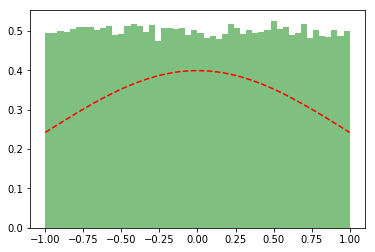

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

N = 100000
mu = 0 # mean of distribution
sigma = 1 # standard deviation of distribution
num_bins = 50

#X = np.concatenate((np.random.normal(0, 1, N) ,np.random.normal(5, 1, N)))
#X = np.random.normal(mu, sigma, N)
X = np.random.uniform(-1, 1, N)
n, bins, patches = plt.hist(X, num_bins, normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.show()   

Zad 2.
Wygeneruj dane z rozkładu jednostajnego na odcinku [-1,1].
Narysuj histogram z danych oraz optymalny (najlepszy z punktu widzenia MLE MLE) rozkład normalny opisujący dane.
Użyj estymatorów największej wiarygodności dla m i sigma. 

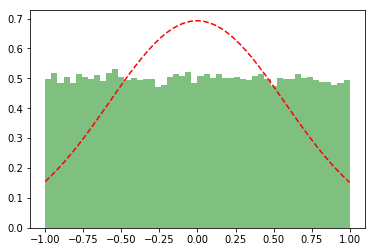

In [2]:
N = 100000
X = np.random.uniform(-1, 1, N)

mu = sum(X) / N
sigma = 0
for i in range(N):
    sigma += (X[i] - mu)**2
sigma = math.sqrt(sigma / N)
    
num_bins = 50

gauss = np.random.normal(mu, sigma, N)
n, bins, patches = plt.hist(X, num_bins, normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.show() 

Zad 3.
Wygeneruj dane z rozkładu normalnego o parametrach m=0 oraz sigma =1.
Narysuj histogram z danych oraz optymalny (najlepszy z punktu widzenia MLE) rozkład normalny opisujący dane.
Użyj estymatorów największej wiarygodności dla m i sigma. 

0.000826801646325 1.0002307571


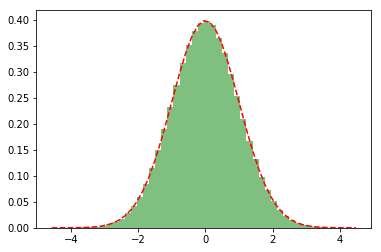

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math

N = 1000000
X = np.random.normal(0, 1, N)
mu = sum(X) / N
sigma = 0
for i in range(N):
    sigma += (X[i] - mu)**2
sigma = sigma / N

print(mu, sigma)
    
num_bins = 50

gauss = np.random.normal(mu, sigma, N)
n, bins, patches = plt.hist(X, num_bins, normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.show() 

 Zad 4.
Wygeneruj dane z rozkładu jednostajnego na odcinku [-1,1].
Napisz funkcję wyliczającą wartość logarytmicznej funkcji wiarygodności względem rodziny rozkładów normalnych dla zadanego zbioru danych. Policz jej wartość dla próbki oraz:

    m = 0, sigma =1
    m = 1, sigma =1.1
    m = 0, sigma =0.9
    m = 1, sigma =1


In [4]:
N = 10000
X = np.random.uniform(-1, 1, N)

def loglike(data, mu, sigma):
    N = len(data)
    summ = 0
    for i in range(N):
        summ += (X[i] - mu)**2
    return -N*np.log(sigma) - N/2*np.log(2/math.pi) -1/2*sigma**2 * summ
    
print("m = 0, sigma =1   ", loglike(X, 0, 1))
print("m = 1, sigma =1.1 ", loglike(X, 1, 1.1))
print("m = 0, sigma =0.9 ", loglike(X, 0, 0.9))
print("m = 1, sigma =1   ", loglike(X, 1, 1))

m = 0, sigma =1    583.813676907
m = 1, sigma =1.1  -6763.67061515
m = 0, sigma =0.9  1955.4978049
m = 1, sigma =1    -4410.25369963


Zad 5.
Wygeneruj dane z rozkładu normalnego o parametrach m=0 oraz sigma =1.
Zminimalizuj zlogarytmowaną funkcję wiarygodności dla rodziny rozkładów normalnych względem parametrów m i sigma. Narysuj histogram z danych oraz optymalny (najlepszy z punktu widzenia MLE) rozkład normalny opisujący dane.
Użyj wyliczonych wartości m i sigma. 

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in log
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in log


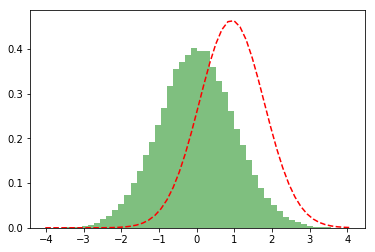

In [5]:
from scipy.optimize import fmin
import random

N = 100000
X = np.random.normal(0, 1, N)

def loglike(data, mu, sigma):
    N = len(data)
    summ = 0
    for i in range(N):
        summ += (X[i] - mu)**2
    return -N*np.log(sigma) - N/2*np.log(2/math.pi) -1/2*sigma**2 * summ

max_func = 0
min_func = 0
maximal_x, maximal_y = None, None
minimal_x, minimal_y = None, None

for i in range(100):
    randx = random.random()*2 - 1
    randy = random.random()*2 - 1
    result = loglike(X, randx, randy)
    max_func = max(max_func, result)
    if max_func == result:
        maximal_x, maximal_y = randx, randy
    min_func = min(min_func, result)
    if min_func == result:
        minimal_x, minimal_y = randx, randy

        
num_bins = 50

gauss = np.random.normal(-minimal_x, minimal_y, N)
for i in range(N):
    gauss[i] = np.log(gauss[i])
    
n, bins, patches = plt.hist(X, num_bins, normed=1, facecolor='green', alpha=0.5)
y = mlab.normpdf(bins, minimal_x, minimal_y)
plt.plot(bins, y, 'r--')
plt.show() 

Zad 6.
Wygeneruj dane z rozkładu jednostajnego na odcinku [-1,1]. Zminimalizuj zlogarytmowaną funkcję wiarygodności dla rodziny rozkładów Split Normal Distribution link względem parametrów m, sigma i tau. Narysuj histogram z danych oraz optymalny (najlepszy z punktu widzenia MLE) rozkład Split Normal Distribution. 

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in log


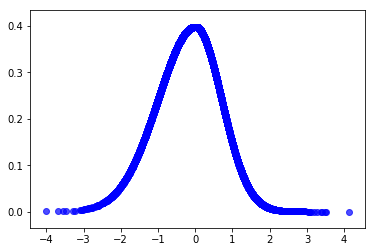

In [6]:
from scipy.optimize import fmin
import random

N = 1000000
X = np.random.uniform(-1, 1, N)

def loglike(data, mu, sigma):
    N = len(data)
    summ = 0
    for i in range(N):
        summ += (X[i] - mu)**2
    return -N*np.log(sigma) - N/2*np.log(2/math.pi) -1/2*sigma**2 * summ # заменить на сплит

max_func = 0
min_func = 0
maximal_x, maximal_y = None, None
minimal_x, minimal_y = None, None

for i in range(100):
    randx = random.random()*2 - 1
    randy = random.random()*2 - 1
    result = loglike(X, randx, randy)
    max_func = max(max_func, result)
    if max_func == result:
        maximal_x, maximal_y = randx, randy
    min_func = min(min_func, result)
    if min_func == result:
        minimal_x, minimal_y = randx, randy

        
num_bins = 50

    
def SN(xlist, m,s,t):
    c=math.sqrt(2./math.pi)*(1./s)*(1./(1+t))
    if x<=m:
        return (c*math.exp(-1./(2* s**2) * (x-m)**2))
    else:
        return (c*math.exp(-1./(t**2 * s**2) * (x-m)**2))
    
res = []
X = []
for i in range (10000):
    #I.append(i)
    x = np.random.normal(0, 1)
    X.append(x)
    y = SN(x, 0, 1, 1)
    res.append(y)


plt.scatter(X, res, color='blue', alpha=0.7)
plt.show()

 Zad 7.
Pobierz dowolny plik z dźwiękiem pliki. Zminimalizuj zlogarytmowaną funkcję wiarygodności dla rodziny rozkładów:

    Rozkładów normalnych
    Split Normal Distribution

Narysuj wyniki ora porównaj wartości zlogarytmowanej funkcji wiarygodności. 